
# PCA from Scratch (Tiny Numbers) + Mini Classification Demo (Built-in PCA)

We compute PCA end-to-end for:

\[
(1,1),\ (2,2),\ (3,3)
\]

Key formulas:

- Centering: \(\;X_c = X - \mu\)  
- Covariance: \(\;\Sigma = \frac{1}{n}X_c^\top X_c\)  
- Eigen: \(\;\Sigma v = \lambda v\)  
- PC scores: \(\;Z = X_c W\)  (columns of \(W\) are eigenvectors)  
- Reconstruct using only PC1: \(\;\hat{X} = z_1 u_1 + \mu\)

> **Rule:** every code cell has **≤ 3 lines**.


## 0) Imports

In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy.linalg import eigh
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline; from sklearn.model_selection import cross_val_score

## 1) Data

In [2]:
X = np.array([[1,1],[2,2],[3,3]], dtype=float)
X

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## 2) Mean vector \(\mu\)

In [3]:
mu = X.mean(axis=0) # axis=0 means column and axis=1 means row
mu

array([2., 2.])

## 3) Center the data  \n\[\nX_c = X - \mu\n\]

In [4]:
Xc = X - mu
Xc

array([[-1., -1.],
       [ 0.,  0.],
       [ 1.,  1.]])

## 4) Covariance matrix
\[
\Sigma = \frac{1}{n} X_c^\top X_c
\]


In [5]:
n = Xc.shape[0]
Sigma = (Xc.T @ Xc)/n
Sigma

array([[0.66666667, 0.66666667],
       [0.66666667, 0.66666667]])

## 5) Eigenvalues and eigenvectors
\[
\Sigma v = \lambda v
\]


In [6]:
vals, vecs = eigh(Sigma)
vals, vecs

(array([0.        , 1.33333333]),
 array([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]))

## 6) Sort eigenvalues (descending): PC1 first

In [7]:
idx = np.argsort(vals)[::-1]
vals, vecs = vals[idx], vecs[:,idx]
vals, vecs

(array([1.33333333, 0.        ]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## 7) PC directions (unit vectors)
- \(u_1\) = PC1 direction  
- \(u_2\) = PC2 direction


In [8]:
u1, u2 = vecs[:,0], vecs[:,1]
u1, u2

(array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678]))

## 8) Explained variance ratio
\[
\text{EVR}_i = \frac{\lambda_i}{\sum_j \lambda_j}
\]


In [9]:
evr = vals/vals.sum()
evr

array([1., 0.])

## 9) Project onto PC axes (PC scores)

\[
Z = X_c W
\]

Each row of \(Z\) is \((z_1, z_2)\) for one sample.


In [10]:
Z = Xc @ vecs
Z

array([[-1.41421356,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.41421356,  0.        ]])

## 10) Notice PC2 score is ~0 for every point (data lies on a line)

In [11]:
Z[:,1]
Z[:,1]

array([0., 0., 0.])

## 11) Reconstruct using only PC1 (drop PC2)

Centered reconstruction: \(\hat{X}_c = z_1 u_1\)

Full reconstruction: \(\hat{X} = \hat{X}_c + \mu\)


In [12]:
Xrec = (Z[:,0:1] * u1.reshape(1,-1)) + mu
Xrec

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

## 12) Reconstruction error (should be all zeros / ~0)

In [13]:
err = X - Xrec
err

array([[-2.22044605e-16, -2.22044605e-16],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

## 13) Visualization: original points + rotated PCA axes (PC1, PC2)

PCA is like **rotating the coordinate axes** so PC1 aligns with the biggest spread.


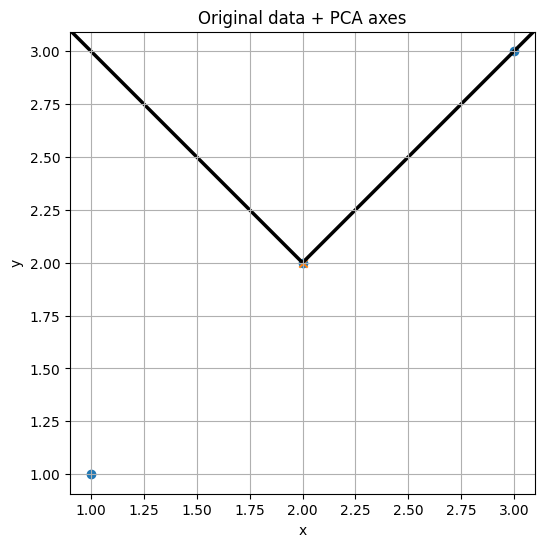

In [15]:
plt.figure(figsize=(6,6)); plt.scatter(X[:,0],X[:,1]); 
plt.scatter([mu[0]],[mu[1]],marker='x'); plt.grid(True); plt.axis('equal')
plt.quiver(mu[0],mu[1],u1[0],u1[1],angles='xy',scale_units='xy',scale=0.6); 
plt.quiver(mu[0],mu[1],u2[0],u2[1],angles='xy',scale_units='xy',scale=0.6); 
plt.title('Original data + PCA axes')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

## 14) Explained variance plot (PC1 should be 1.0, PC2 should be 0.0)

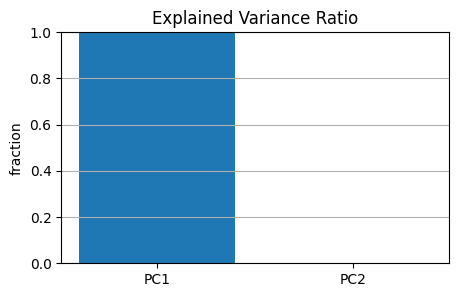

In [16]:
plt.figure(figsize=(5,3)); plt.bar(['PC1','PC2'], evr); plt.ylim(0,1); plt.grid(True, axis='y')
plt.title('Explained Variance Ratio'); plt.ylabel('fraction'); plt.show()

## 15) PC1 as a 1D representation (compression: 2D → 1D)

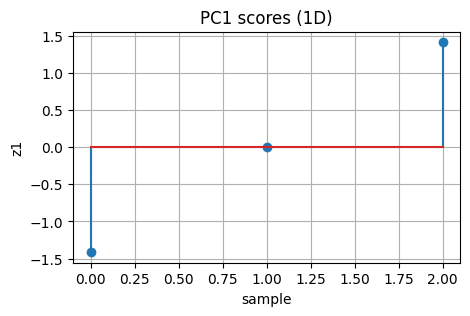

In [17]:
plt.figure(figsize=(5,3)); plt.stem(Z[:,0]); plt.grid(True)
plt.title('PC1 scores (1D)'); plt.xlabel('sample'); plt.ylabel('z1'); plt.show()


# Mini classification demo (10 samples, 4 features)

Now we use built-in `sklearn` PCA to show how PCA helps in real ML pipelines.

- Original data has **4 features**.
- We will reduce to **2 PCs** and train a classifier.
- We compare cross-validated accuracy **with vs without PCA**.


## 16) Create a tiny 10×4 dataset (integers) + labels

In [18]:
X4 = np.array([[2,2,0,0],
               [3,3,0,1],
               [4,4,1,0],
               [5,5,1,1],
               [-2,-2,0,0],
               [-3,-3,0,1],
               [-4,-4,1,0],
               [-5,-5,1,1],
               [1,1,0,0],
               [-1,-1,0,0]], float)
y = np.array([1,1,1,1,0,0,0,0,1,0])
X4, y
# Obj: Classification using Logistic Reg on full data and PCA data

(array([[ 2.,  2.,  0.,  0.],
        [ 3.,  3.,  0.,  1.],
        [ 4.,  4.,  1.,  0.],
        [ 5.,  5.,  1.,  1.],
        [-2., -2.,  0.,  0.],
        [-3., -3.,  0.,  1.],
        [-4., -4.,  1.,  0.],
        [-5., -5.,  1.,  1.],
        [ 1.,  1.,  0.,  0.],
        [-1., -1.,  0.,  0.]]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0]))

## 17) Fit PCA (2 components) just to *see* the projection

We standardize then apply PCA:
\[
X_s = \text{StandardScaler}(X),\quad Z = \text{PCA}(X_s)
\]


In [19]:
sc = StandardScaler(); Xs = sc.fit_transform(X4)
pca2 = PCA(n_components=2); Z2 = pca2.fit_transform(Xs)
Z2

array([[ 0.85280287, -1.15470054],
       [ 1.2792043 ,  0.28867513],
       [ 1.70560573,  0.28867513],
       [ 2.13200716,  1.73205081],
       [-0.85280287, -1.15470054],
       [-1.2792043 ,  0.28867513],
       [-1.70560573,  0.28867513],
       [-2.13200716,  1.73205081],
       [ 0.42640143, -1.15470054],
       [-0.42640143, -1.15470054]])

## 18) Plot the 2D PCA projection (each point colored by class label)

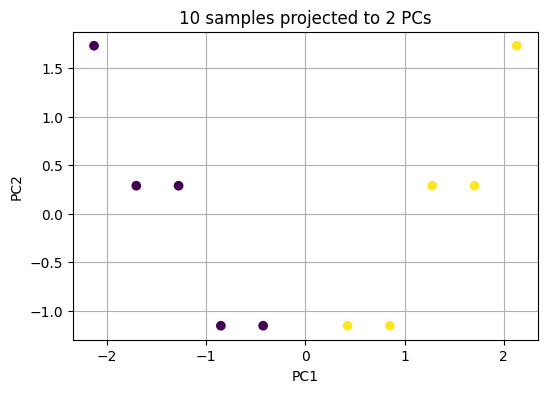

In [20]:
plt.figure(figsize=(6,4)); plt.scatter(Z2[:,0], Z2[:,1], c=y); plt.grid(True)
plt.title('10 samples projected to 2 PCs'); plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()

## 19) Explained variance ratio in this 4D dataset (how much each PC keeps)

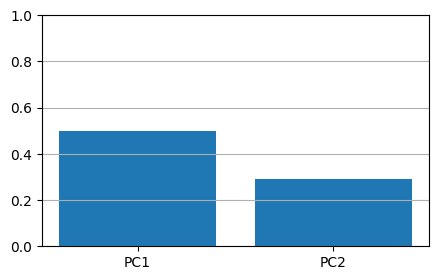

In [21]:
pca2.explained_variance_ratio_
plt.figure(figsize=(5,3)); plt.bar(['PC1','PC2'], pca2.explained_variance_ratio_); 
plt.ylim(0,1); plt.grid(True, axis='y'); plt.show()

## 20) Compare classification with vs without PCA (cross-validation)

We compare:

- **No PCA**: StandardScaler → LogisticRegression  
- **With PCA(2)**: StandardScaler → PCA(2) → LogisticRegression  
- **With PCA(1)**: StandardScaler → PCA(1) → LogisticRegression  

This shows how PCA can reduce dimensionality with minimal performance loss (and sometimes improvement).


In [22]:
pipe_full = Pipeline([('sc',StandardScaler()),('clf',LogisticRegression(max_iter=2000))])
pipe_pca2 = Pipeline([('sc',StandardScaler()),('pca',PCA(n_components=2)),('clf',LogisticRegression(max_iter=2000))])
pipe_pca1 = Pipeline([('sc',StandardScaler()),('pca',PCA(n_components=1)),('clf',LogisticRegression(max_iter=2000))])

## 21) Cross-validated accuracy (5-fold)

In [23]:
acc_full = cross_val_score(pipe_full, X4, y, cv=5).mean()
acc_pca2 = cross_val_score(pipe_pca2, X4, y, cv=5).mean(); 
acc_pca1 = cross_val_score(pipe_pca1, X4, y, cv=5).mean()
{'no_pca': acc_full, 'pca_2d': acc_pca2, 'pca_1d': acc_pca1}

{'no_pca': 1.0, 'pca_2d': 1.0, 'pca_1d': 1.0}

## 22) Visual summary: accuracy vs number of PCA components

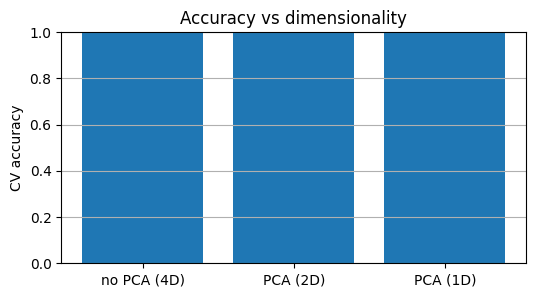

In [24]:
accs = [acc_full, acc_pca2, acc_pca1]
plt.figure(figsize=(6,3)); plt.bar(['no PCA (4D)','PCA (2D)','PCA (1D)'], accs); plt.ylim(0,1); plt.grid(True, axis='y')
plt.title('Accuracy vs dimensionality'); plt.ylabel('CV accuracy'); plt.show()


# What learners should conclude

1. In the tiny dataset \((1,1),(2,2),(3,3)\), **PC1 explains 100%**, **PC2 explains 0%** → perfect compression from **2D → 1D**.  
2. In the 4-feature classification demo, PCA provides a **lower-dimensional representation** that can keep most structure and often maintains accuracy while simplifying the model.

Try changing `n_components` and re-running the last section to see the trade-off!
